 # System Threat Forecater using Classification/Regression ML apporach #



# 0. Setting up the environment:

In [1]:
###########################################

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
        
############################################

/kaggle/input/System-Threat-Forecaster/sample_submission.csv
/kaggle/input/System-Threat-Forecaster/train.csv
/kaggle/input/System-Threat-Forecaster/test.csv
/kaggle/input/mydata/sample_submission.csv
/kaggle/input/mydata/train.csv
/kaggle/input/mydata/test.csv


# 1. Dummy Model Implementation:

In [2]:
######### System Threat Forecaster (Dummy) #########

'''
# Loading necessary library module -

from sklearn.dummy import DummyClassifier

# Loading the training data given -

dataset = pd.read_csv('/kaggle/input/mydata/train.csv')

# Separating features (X) and target (y)

X = dataset.drop('target', axis=1)  # Droping the target column to use only features
y = dataset['target']              # Required Target column

# Training a DummyClassifier

This is a basic dummy model for initial submission and leaderboard registration

model = DummyClassifier().fit(X, y) 

# Loading the test data

X_test_data = pd.read_csv('/kaggle/input/mydata/test.csv')

# Predicting on the test data

y_prediction = model.predict(X_test_data)

# Create the submission file

submission = pd.DataFrame({
    'id': range(X_test_data.shape[0]),  # Generating ID column as per sample_submission.csv
    'target': y_prediction              # Add predictions as the target column in sample_submission.csv
})

# Save the submission file

submission.to_csv('submission.csv', index=False)
'''

######### ######### ######### ######### #########


"\n# Loading necessary library module -\n\nfrom sklearn.dummy import DummyClassifier\n\n# Loading the training data given -\n\ndataset = pd.read_csv('/kaggle/input/mydata/train.csv')\n\n# Separating features (X) and target (y)\n\nX = dataset.drop('target', axis=1)  # Droping the target column to use only features\ny = dataset['target']              # Required Target column\n\n# Training a DummyClassifier\n\nThis is a basic dummy model for initial submission and leaderboard registration\n\nmodel = DummyClassifier().fit(X, y) \n\n# Loading the test data\n\nX_test_data = pd.read_csv('/kaggle/input/mydata/test.csv')\n\n# Predicting on the test data\n\ny_prediction = model.predict(X_test_data)\n\n# Create the submission file\n\nsubmission = pd.DataFrame({\n    'id': range(X_test_data.shape[0]),  # Generating ID column as per sample_submission.csv\n    'target': y_prediction              # Add predictions as the target column in sample_submission.csv\n})\n\n# Save the submission file\n\nsubm

# 2. Importing necessary Libraries (Data Wrangling): 

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the libraries/modules needed for basic understanding of the datasets given.


In [4]:

trdata = pd.read_csv('/kaggle/input/mydata/train.csv')

print("Magnitude of the dataset: ")
print(trdata.size)

print("\nBrief description of the dataset: ")
trdata.info()


Magnitude of the dataset: 
7600000

Brief description of the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEn

# 3. Importing the dataset (Data Loading and Preprocessing):


In [5]:

### Original data statistical summary -
org = trdata.describe()
print(org)


       IsBetaUser  RealTimeProtectionState  IsPassiveModeEnabled  \
count    100000.0             99934.000000         100000.000000   
mean          0.0                 6.848430              0.017620   
std           0.0                 1.015166              0.131566   
min           0.0                 0.000000              0.000000   
25%           0.0                 7.000000              0.000000   
50%           0.0                 7.000000              0.000000   
75%           0.0                 7.000000              0.000000   
max           0.0                 8.000000              1.000000   

       AntivirusConfigID  NumAntivirusProductsInstalled  \
count       99924.000000                   99924.000000   
mean        47975.710440                       1.326528   
std         13803.321533                       0.520681   
min            39.000000                       1.000000   
25%         49480.000000                       1.000000   
50%         53447.000000         

In [6]:

print("Small sneek peek of the dataset: ")
trdata.head()


Small sneek peek of the dataset: 


,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,...,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,...,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,...,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,...,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,...,0,0.0,0,0,0.0,1.0,7.0,2018-09-15 19:34:00,2018-09-11,0


In [7]:

trdata.tail()


,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
99995,a378b2196a7a1d8ee0d4f989ee46730e,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1582.0,0,7.0,0,68585.0,2.0,...,0,0.0,0,0,0.0,1.0,7.0,2018-09-21 00:59:00,2018-09-20,0
99996,7f4433ca05d24b9bbdd3932f8b05e61f,win8defender,1.1.15100.1,4.18.1806.18062,1.273.1156.0,0,7.0,0,11280.0,2.0,...,0,0.0,0,0,0.0,0.0,3.0,2018-08-10 07:23:00,2018-07-10,0
99997,d6852dfff534e03d5ddfd3c7875ab072,win8defender,1.1.15200.1,4.18.1807.18075,1.275.209.0,0,7.0,0,53447.0,1.0,...,1,0.0,0,0,0.0,1.0,1.0,2018-08-26 23:51:00,2018-03-13,1
99998,70a8dc682128c9ff78a3de5aea9dac74,win8defender,1.1.14901.4,4.16.17656.18052,1.269.641.0,0,7.0,0,53447.0,1.0,...,1,0.0,1,1,1.0,0.0,1.0,2018-06-04 17:13:00,2018-05-08,0
99999,ad9c385b53f2ca788933a39603b84eda,win8defender,1.1.15000.2,4.18.1806.18062,1.271.1003.0,0,7.0,0,7945.0,2.0,...,1,0.0,0,0,0.0,1.0,11.0,2018-07-14 15:36:00,2018-08-14,0


# 4. Exploratory Data Analysis:


## 4.1 Handling Missing Values - 

In [8]:

# Step 1: We firstly check for missing values

missing_values = trdata.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])  # Prints/shows only the columns with missing values

# Step 2: Way of handling the missing values 

# a)Approach 1: Dropping columns with too many missing values (threshold of 50% missing)
threshold = len(trdata) * 0.5  # Setting the threshold according to my comfort
trdata = trdata.loc[:, trdata.isnull().sum() < threshold]

# b) Approach 2: Impute numerical columns with median
# Columns with numerical values are supposed to handle the missing values using their meadian value
numerical_cols = trdata.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    if trdata[col].isnull().sum() > 0:
        trdata[col].fillna(trdata[col].median(), inplace=True)  # Replace with median

# c) Approach 3: Substitute categorical columns with mode
# Columns with categorical values can be handled to replace the missing position with the most repeating value
categorical_cols = trdata.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if trdata[col].isnull().sum() > 0:
        trdata[col].fillna(trdata[col].mode()[0], inplace=True)  # Replace with mode 


Missing values in each column:
RealTimeProtectionState                66
AntivirusConfigID                      76
NumAntivirusProductsInstalled          76
NumAntivirusProductsEnabled            76
CityID                                623
IsSystemProtected                      76
SMode                                 981
IEVersionID                           107
FirewallEnabled                       166
EnableLUA                              19
OEMNameID                             212
OEMModelID                            228
ProcessorCoreCount                     85
ProcessorManufacturerID                85
ProcessorModelID                       85
PrimaryDiskCapacityMB                 110
PrimaryDiskType                        23
SystemVolumeCapacityMB                110
TotalPhysicalRAMMB                    151
ChassisType                             2
PrimaryDisplayDiagonalInches           72
PrimaryDisplayResolutionHorizontal     72
PrimaryDisplayResolutionVertical       72
Int

In [9]:

# Last step: Validation of the process of handling the missing values
print("Missing values after handling:")
print(trdata.isnull().sum().sum())


Missing values after handling:
0


## 4.2 Statistical Summary after Data Pre-processing -

In [10]:

modified = trdata.describe()
print(modified)


       IsBetaUser  RealTimeProtectionState  IsPassiveModeEnabled  \
count    100000.0            100000.000000         100000.000000   
mean          0.0                 6.848530              0.017620   
std           0.0                 1.014838              0.131566   
min           0.0                 0.000000              0.000000   
25%           0.0                 7.000000              0.000000   
50%           0.0                 7.000000              0.000000   
75%           0.0                 7.000000              0.000000   
max           0.0                 8.000000              1.000000   

       AntivirusConfigID  NumAntivirusProductsInstalled  \
count      100000.000000                  100000.000000   
mean        47979.868620                       1.326280   
std         13798.898991                       0.520561   
min            39.000000                       1.000000   
25%         49480.000000                       1.000000   
50%         53447.000000         

## 4.3 Comparison of the datasets before and after handling the missing values - 

In [11]:

count_diff = org.loc['count'] - modified.loc['count']
mean_diff = org.loc['mean'] - modified.loc['mean']
std_diff = org.loc['std'] - modified.loc['std']
summary_diff = org.loc[['min', '25%', '50%', '75%', 'max']] - modified.loc[['min', '25%', '50%', '75%', 'max']]

print("Count Difference:\n", count_diff)
print("Mean Difference:\n", mean_diff)
print("Standard Deviation Difference:\n", std_diff)
print("Summary Statistics Difference:\n", summary_diff)


Count Difference:
 IsBetaUser                              0.0
RealTimeProtectionState               -66.0
IsPassiveModeEnabled                    0.0
AntivirusConfigID                     -76.0
NumAntivirusProductsInstalled         -76.0
NumAntivirusProductsEnabled           -76.0
HasTpm                                  0.0
CountryID                               0.0
CityID                               -623.0
GeoRegionID                             0.0
LocaleEnglishNameID                     0.0
OSBuildNumber                           0.0
OSProductSuite                          0.0
IsSystemProtected                     -76.0
AutoSampleSubmissionEnabled             0.0
SMode                                -981.0
IEVersionID                          -107.0
FirewallEnabled                      -166.0
EnableLUA                             -19.0
OEMNameID                            -212.0
OEMModelID                           -228.0
ProcessorCoreCount                    -85.0
ProcessorManu

# 5. Data Visualization:

## 5.1 Distribution of the Target Variable - 

Purpose: Understand the balance of the target variable.

Parameters used: target column (binary/int).

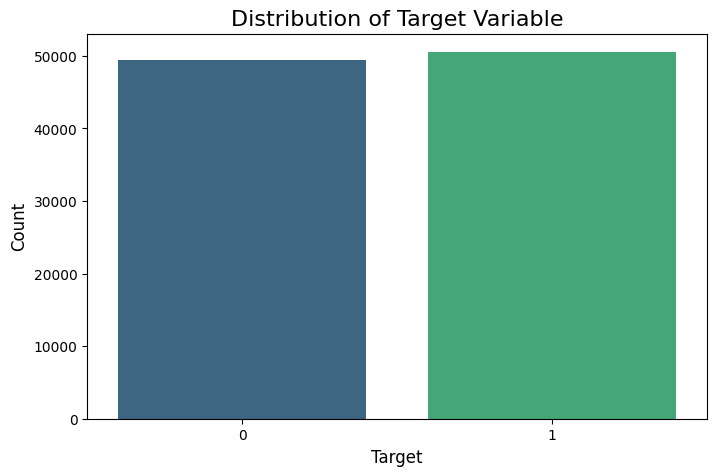

In [12]:

plt.figure(figsize=(8, 5))
sns.countplot(x='target', data=trdata, palette='viridis')
plt.title('Distribution of Target Variable', fontsize=16)
plt.xlabel('Target', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


## 5.2 Correlation heatmap -

Purpose: Identify relationships between numerical features and their correlation with the target.

Parameters used: Numerical columns (like RealTimeProtectionState, AntivirusConfigID, etc.).

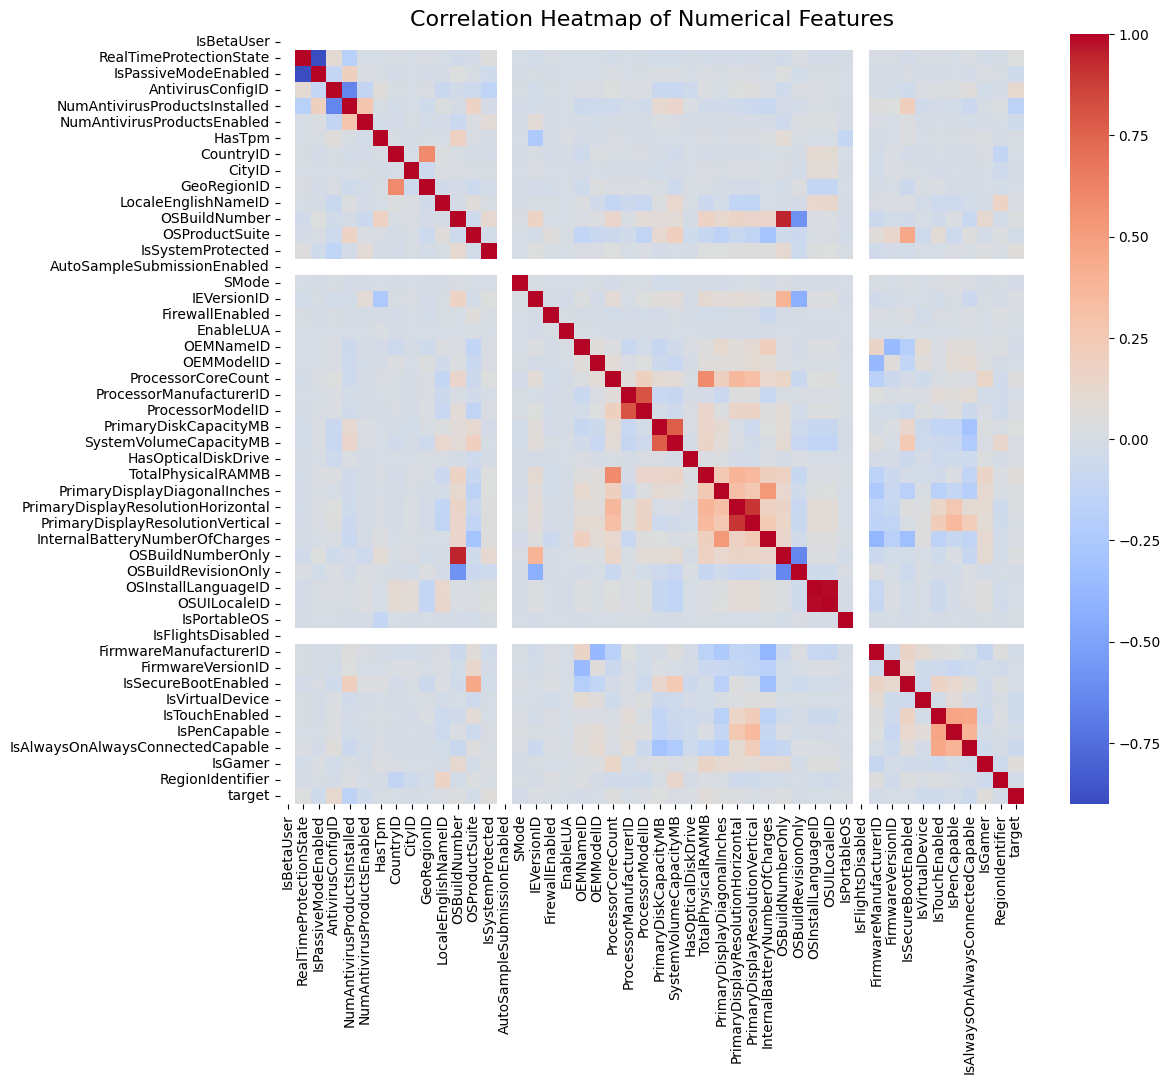

In [13]:

# Selection of only numeric columns
trdata_numeric = trdata.select_dtypes(include=[float, int])

# Computing correlation matrix using built-in function
correlation_matrix = trdata_numeric.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()


## 5.3 Feature Distribution by Target -
Purpose: Comparing the distribution of key features (numerical/categorical) across the target classes.

Parameters used: Choosing any particular key feature, e.g., NumAntivirusProductsInstalled or OSVersion.

### 5.3.1 Numerical Category:

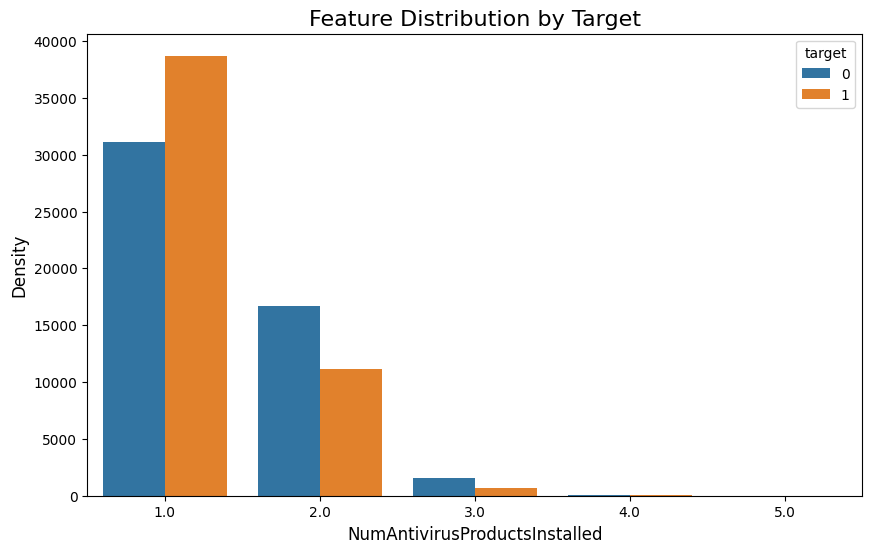

In [14]:

# Distribution of a numerical feature grouped by target
# Numerical feature selected : 'NumAntivirusProductsInstalled'

plt.figure(figsize=(10, 6))
sns.countplot(data=trdata, x='NumAntivirusProductsInstalled', hue='target')
plt.title('Feature Distribution by Target', fontsize=16)
plt.xlabel('NumAntivirusProductsInstalled', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()


### 5.3.2 Categorical Category: 

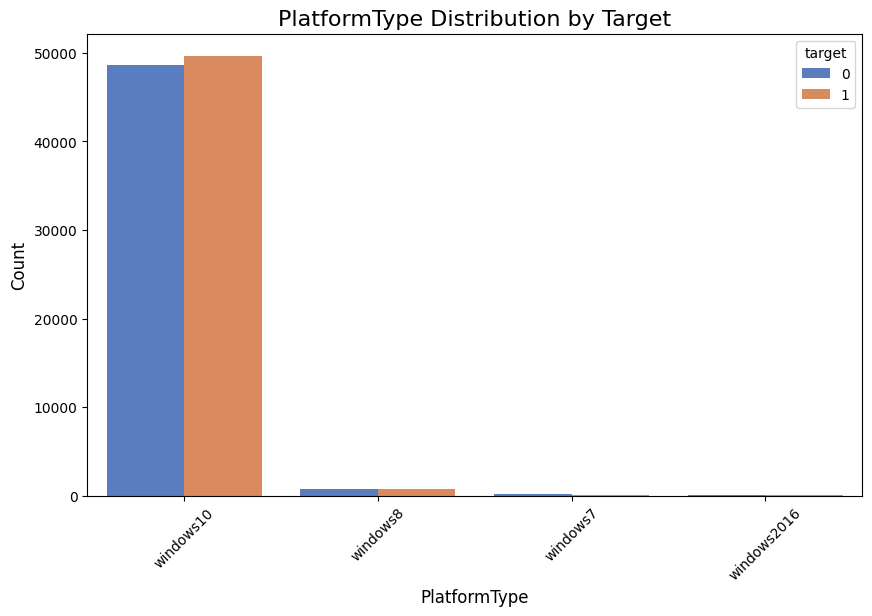

In [15]:

# Count plot for a categorical feature
# Categorical feature selected : 'PlatformType'
plt.figure(figsize=(10, 6))
sns.countplot(data=trdata, x='PlatformType', hue='target', palette='muted')
plt.title('PlatformType Distribution by Target', fontsize=16)
plt.xlabel('PlatformType', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


# 6. Train-Validation Split:

In [16]:

# Importing the necessary library
from sklearn.model_selection import train_test_split

# Defining the features (X) and target (y)
X = trdata.drop(columns=['target'])  
y = trdata['target']

# Train-validation split method implementation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Printing the output regarding the split
print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")


Training set size: (80000, 75)
Validation set size: (20000, 75)


## 6.1 Data Pre-Processing on training and validation sets - 


In [17]:

# Importing the necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Creating copies to avoid modifying original data
X_train_processed = X_train.copy()
X_val_processed = X_val.copy()

# Step 1: Handle missing values within training and validation sets 

# For numeric (data type) columns
numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
if len(numeric_columns) > 0:
    num_imputer = SimpleImputer(strategy='mean')
    X_train_processed[numeric_columns] = num_imputer.fit_transform(X_train[numeric_columns])
    X_val_processed[numeric_columns] = num_imputer.transform(X_val[numeric_columns])

# For categorical (data type) columns
categorical_columns = X_train.select_dtypes(include=['object']).columns
if len(categorical_columns) > 0:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    X_train_processed[categorical_columns] = cat_imputer.fit_transform(X_train[categorical_columns])
    X_val_processed[categorical_columns] = cat_imputer.transform(X_val[categorical_columns])

# Step 2: Scaling the numeric features (Standardization over the dataset split)
scaler = StandardScaler()
X_train_processed[numeric_columns] = scaler.fit_transform(X_train_processed[numeric_columns])
X_val_processed[numeric_columns] = scaler.transform(X_val_processed[numeric_columns])

### This is the step where in we are performing normalization/standardization procedures ensuring that 
### data transformation takes place 

# Step 3: Handling categorical features using label encoding
label_encoders = {}
for col in categorical_columns:
    # We will try to collect unique values from both train and validation sets
    train_unique = set(X_train_processed[col].unique())
    val_unique = set(X_val_processed[col].unique())
    unknown_categories = val_unique - train_unique
    
    if unknown_categories:
        # Replacing the unknown categories with the most frequent value from training set 
        # Similar to mode substitution in categorical dataset handling
        most_frequent = X_train_processed[col].mode()[0]
        X_val_processed.loc[X_val_processed[col].isin(unknown_categories), col] = most_frequent
        print(f"Column '{col}' had {len(unknown_categories)} unknown categories. Replaced with mode: {most_frequent}")
    
    # Now, we will try to fit the label encoder on training data
    le = LabelEncoder()
    X_train_processed[col] = le.fit_transform(X_train_processed[col])
    X_val_processed[col] = le.transform(X_val_processed[col])
    label_encoders[col] = le


Column 'MachineID' had 19950 unknown categories. Replaced with mode: 022b86e58f1858277c941283764b930c
Column 'EngineVersion' had 1 unknown categories. Replaced with mode: 1.1.15200.1
Column 'SignatureVersion' had 153 unknown categories. Replaced with mode: 1.273.1420.0
Column 'OSVersion' had 1 unknown categories. Replaced with mode: 10.0.0.0
Column 'OSBuildLab' had 9 unknown categories. Replaced with mode: 17134.1.amd64fre.rs4_release.180410-1804
Column 'OSEdition' had 1 unknown categories. Replaced with mode: Core
Column 'OSSkuFriendlyName' had 1 unknown categories. Replaced with mode: CORE
Column 'DateAS' had 151 unknown categories. Replaced with mode: 2018-08-15 06:29:00


## 6.2 Identification of potential outliers in the split datasets -

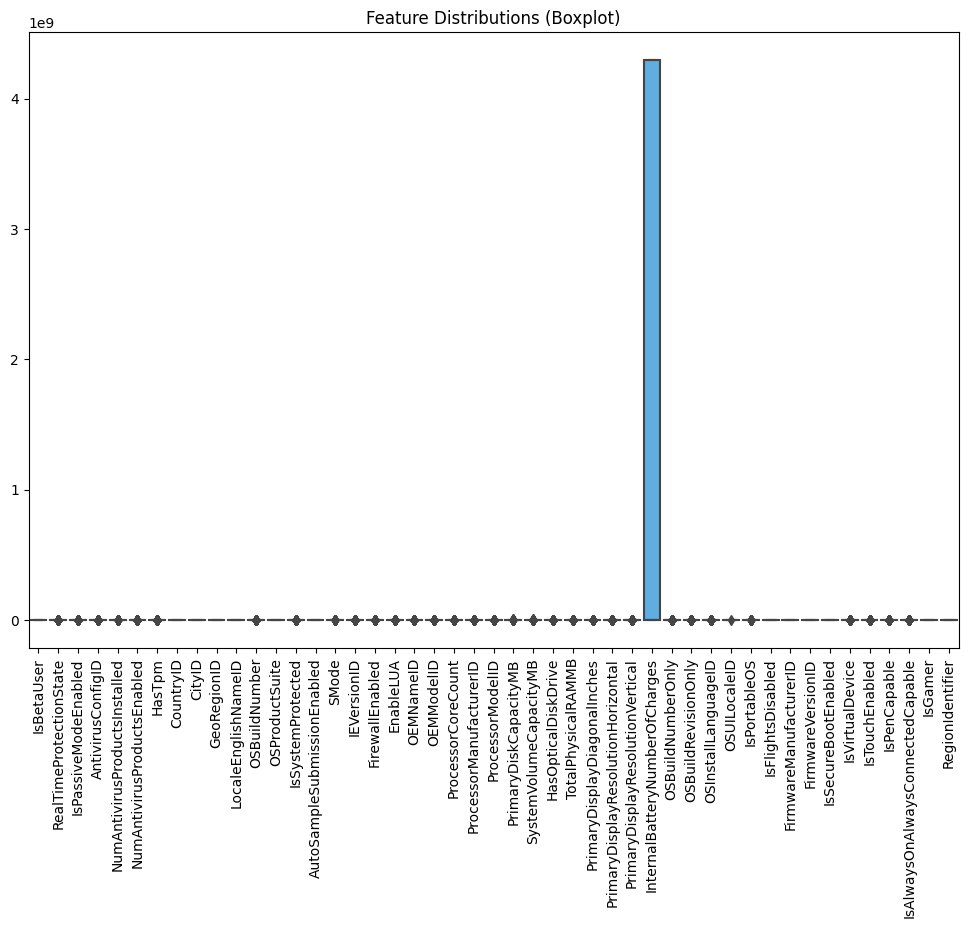

In [18]:

plt.figure(figsize=(12, 8))
sns.boxplot(data=X_train)
plt.xticks(rotation=90)
plt.title("Feature Distributions (Boxplot)")
plt.show()


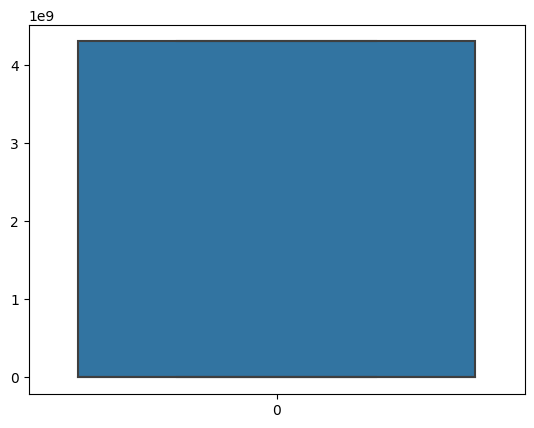

In [19]:

## This is the feature column that turns out to be a potential outlier in the training split dataset - 
## Understanding the same in detail
sns.boxplot(X_train["InternalBatteryNumberOfCharges"]) 
plt.show()


The y-axis scale (in billions) suggests that the data might have very large numerical values or potential outliers. It could also indicate lack of variation if at all values are nearly the same at a large scale(i.e.) at that level.

# 7. Building a Base Line Model:


Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.52      0.56      9895
           1       0.59      0.68      0.63     10105

    accuracy                           0.60     20000
   macro avg       0.60      0.60      0.60     20000
weighted avg       0.60      0.60      0.60     20000


Top 10 Most Important Features:
                          feature  importance
73                         DateAS    0.183768
9   NumAntivirusProductsInstalled    0.180121
43   PrimaryDisplayDiagonalInches    0.078283
8               AntivirusConfigID    0.072246
3                      AppVersion    0.038622
55                  OSInstallType    0.037748
36               ProcessorModelID    0.026471
65              FirmwareVersionID    0.025247
41             TotalPhysicalRAMMB    0.025115
4                SignatureVersion    0.024439


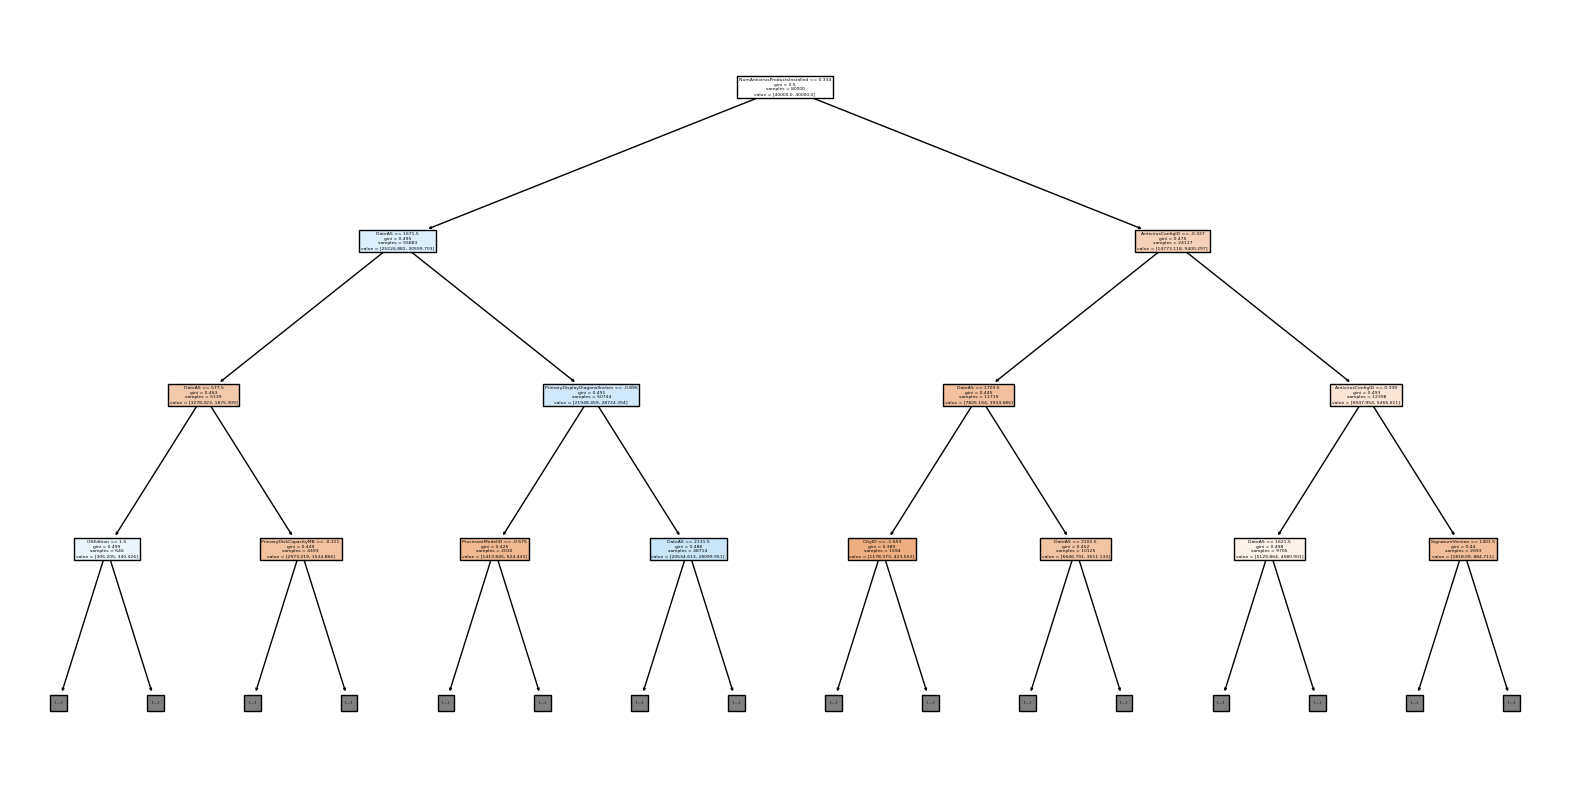

In [20]:

from sklearn.metrics import classification_report

# Train Decision Tree model with optimized parameters (Classification Approach using Decision Trees)
dt_model = DecisionTreeClassifier(
    max_depth=10,              # Preventing overfitting
    min_samples_split=10,      # Minimum samples considered for split
    min_samples_leaf=5,        # Minimum samples required at leaf node (my consideration)
    random_state=42,
    class_weight='balanced'    # Handles class imbalance
)

## Here max_depth, min_samples_split help is performing hyper parameter tuning for the decision tree model that we have initialized.

dt_model.fit(X_train_processed, y_train)

# Making suitable predictions
y_pred = dt_model.predict(X_val_processed)
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# Printing important features from our split
feature_importance = pd.DataFrame({
    'feature': X_train_processed.columns,
    'importance': dt_model.feature_importances_
})
print("\nTop 10 Most Important Features:")
print(feature_importance.sort_values('importance', ascending=False).head(10))

# Visualization of the decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X_train_processed.columns, filled=True, max_depth=3)
plt.show()


# 8. Model Building:

## 8.1 Random Forest (Classification) -

### 8.1.1 Hyperparameter Tuning for Random Forest

In [21]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Random Forest Classifier Intilization
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Defining the Hyperparameter grid for our random forest model
rf_params = {
    'n_estimators': [50, 100, 200],        # Specifying the mumber of trees in the forest
    'max_depth': [10, 20, None],          # Maximum depth of each tree allowed
    'min_samples_split': [5, 10, 20],     # Minimum samples we are considering to split a node
    'min_samples_leaf': [2, 5, 10]        # Minimum samples at each leaf node
}

# GridSearch method for hyperparameter tuning
rf_grid = GridSearchCV(rf_model, rf_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
rf_grid.fit(X_train_processed, y_train)

print("\nBest Hyperparameters for Random Forest:")
print(rf_grid.best_params_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits

Best Hyperparameters for Random Forest:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 20, 'n_estimators': 200}


### 8.1.2 Training and Evaluating Random Forest Model

In [22]:

# Using the best hyperparameters from tuning
rf_best = rf_grid.best_estimator_

# Training the Random Forest model
rf_best.fit(X_train_processed, y_train)

# Predictions on validation set
y_pred_rf = rf_best.predict(X_val_processed)

# Corresponding Results obtained
print("\nRandom Forest - Classification Report:")
print(classification_report(y_val, y_pred_rf))



Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.59      0.61      9895
           1       0.62      0.66      0.64     10105

    accuracy                           0.62     20000
   macro avg       0.62      0.62      0.62     20000
weighted avg       0.62      0.62      0.62     20000



## 8.2 LightGBM Model (Classification) - 

### 8.2.1 Hyper parameter tuning for LightGBM

In [23]:

from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV

# Step 1: Defining my set of parameters for RandomizedSearchCV
param_distributions = {
    'n_estimators': [50, 100, 150, 200],  # Number of boosting rounds
    'max_depth': [3, 5, 7, 9],            # Maximum depth of trees
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage
    'subsample': [0.6, 0.8, 1.0],         # Subsample ratio of training instances
    'colsample_bytree': [0.6, 0.8, 1.0],  # Subsample ratio of columns for each tree
    'min_child_samples': [10, 20, 30],    # Minimum number of data points in a leaf
    'reg_alpha': np.linspace(0, 1, 5),    # L1 regularization for feature selection particularly
    'reg_lambda': np.linspace(0, 1, 5)    # L2 regularization
}

# Step 2: Instantiate the LightGBM model
lgb_model = LGBMClassifier(random_state=42)

# Step 3: RandomizedSearchCV for hyperparameter tuning
lgb_random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_distributions,
    n_iter=50,  # Number of parameter combinations to try
    scoring='accuracy',  # Use accuracy to evaluate the best parameters
    cv=5,  # 5-fold cross-validation
    verbose=3,  # Increase verbosity for detailed output
    n_jobs=-1,  # Utilize all processors (CPU Cores)
    random_state=42
)

# Step 4: Fitting RandomizedSearchCV on the training data
lgb_random_search.fit(X_train_processed, y_train)

# Step 5: Display the best parameters and score
print("\nBest Parameters for LightGBM (RandomizedSearchCV):")
print(lgb_random_search.best_params_)
print(f"Best Cross-Validation Score: {lgb_random_search.best_score_:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Number of positive: 40420, number of negative: 39580
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5034
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 72
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505250 -> initscore=0.021001
[LightGBM] [Info] Start training from score 0.021001
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

Best Parameters for LightGBM (RandomizedSearchCV):
{'subsample': 1.0, 'reg_lambda

### 8.2.2 Training and Evaluating LightGBM

In [24]:

# Step 6: Make predictions with best model that is obtained
lgb_best_model = lgb_random_search.best_estimator_

## Note to make valid predictions on the way
y_pred_lgb = lgb_best_model.predict(X_val_processed)

# Step 7: Evaluate performance using the classification report function
print("\nClassification Report for LightGBM:")
print(classification_report(y_val, y_pred_lgb))



Classification Report for LightGBM:
              precision    recall  f1-score   support

           0       0.63      0.60      0.61      9895
           1       0.63      0.66      0.64     10105

    accuracy                           0.63     20000
   macro avg       0.63      0.63      0.63     20000
weighted avg       0.63      0.63      0.63     20000



## 8.3 Naive Bayes (Classification) - 

### 8.3.1 Hyper parameter tuning for Naive Bayes 

In [25]:

from sklearn.naive_bayes import GaussianNB

# Step 1: Defining the hyperparameter grid for Naive Bayes - GridSearch Approach
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Small adjustments to variance
}

# Step 2: Initialization of GridSearchCV Algorithm
nb_tuner = GridSearchCV(
    GaussianNB(),
    param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Utilize all processors
)

# Step 3: Fitting the tuner on training data
nb_tuner.fit(X_train_processed, y_train)

# Step 4: Extract the best parameters and displaying the same
best_params_nb = nb_tuner.best_params_
print("\nBest Hyperparameters for Naive Bayes:")
print(best_params_nb)

# Step 5: Retrievig the best estimator
best_nb_model = nb_tuner.best_estimator_



Best Hyperparameters for Naive Bayes:
{'var_smoothing': 1e-09}


### 8.3.2 Training and Evaluating Naive Bayes Model

In [26]:

# Step 1: Fitting the best model to training data
best_nb_model.fit(X_train_processed, y_train)

# Step 2: Making the relevant predictions on validation data
y_tuned_pred_nb = best_nb_model.predict(X_val_processed)

# Step 3: Evaluation of the tuned model using pre-built classification report function
print("\nClassification Report for Naive Bayes (Tuned):")
print(classification_report(y_val, y_tuned_pred_nb))



Classification Report for Naive Bayes (Tuned):
              precision    recall  f1-score   support

           0       0.62      0.24      0.35      9895
           1       0.54      0.86      0.66     10105

    accuracy                           0.55     20000
   macro avg       0.58      0.55      0.51     20000
weighted avg       0.58      0.55      0.51     20000



## 8.4 Logistic Regression Model(Pipeline Implementation) -

### 8.4.1 Pipeline implementation of the model

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report

# Identifying numeric & categorical columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing for numeric features: Fill missing values & scale
numeric_preprocessor = Pipeline([
    ('fill_missing', SimpleImputer(strategy='mean')),
    ('scale_features', StandardScaler())
])

# Preprocessing for categorical features: Fill missing values & one-hot encode
categorical_preprocessor = Pipeline([
    ('fill_missing', SimpleImputer(strategy='most_frequent')),
    ('encode_labels', OneHotEncoder(handle_unknown='ignore'))
])

# Combining both preprocessing steps
full_preprocessor = ColumnTransformer([
    ('numeric', numeric_preprocessor, numeric_cols),
    ('categorical', categorical_preprocessor, categorical_cols)
])

# Building the pipeline with preprocessing + Logistic Regression
logistic_pipeline = Pipeline([
    ('preprocessing', full_preprocessor),
    ('model', LogisticRegression(
        solver='saga',  # Alternative solver
        max_iter=5000,  # Setting a very high iteration limit
        class_weight='balanced',  # Handling class imbalance case scenario
        random_state=42
    ))
])



### 8.4.2 Training the model and evaluating Logistic Regression Model

In [28]:

# Training the model on the training data
logistic_pipeline.fit(X_train, y_train)

# Making predictions on the validation set
y_predicted = logistic_pipeline.predict(X_val)

# Evaluate model performance using the classification report method
print("\n Classification Report:")
print(classification_report(y_val, y_predicted))



 Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.58      0.60      9895
           1       0.61      0.65      0.63     10105

    accuracy                           0.61     20000
   macro avg       0.61      0.61      0.61     20000
weighted avg       0.61      0.61      0.61     20000



# Submission report (submission.csv) generation -

In [29]:

# Importing the test dataset
X_test = pd.read_csv('/kaggle/input/mydata/test.csv')
X_test_processed = X_test.copy()

# Step 1: Handling the missing values for test data
if len(numeric_columns) > 0:
    X_test_processed[numeric_columns] = num_imputer.transform(X_test[numeric_columns])

# Step 2: Handling categorical columns
if len(categorical_columns) > 0:
    for col in categorical_columns:
        print(f"\nProcessing column: {col}")
        
        # Converting both test data and encoder classes to strings for comparison
        X_test_processed[col] = X_test_processed[col].astype(str)
        known_categories = set(label_encoders[col].classes_.astype(str))
        
        # Finding unknown categories
        current_categories = set(X_test_processed[col].unique())
        unknown_categories = current_categories - known_categories
        
        if unknown_categories:
            # We will use the first known category as replacement
            replacement_value = label_encoders[col].classes_[0]
            
            # Replace unknown values
            for unknown_cat in unknown_categories:
                mask = X_test_processed[col] == unknown_cat
                X_test_processed.loc[mask, col] = replacement_value
                
        # Verifying for no unknown categories remain
        remaining_unknown = set(X_test_processed[col].unique()) - known_categories
        if remaining_unknown:
            raise ValueError(f"Still have unknown categories in {col}: {remaining_unknown}")
        
        # Transforming using label encoder just like in training dataset
        try:
            X_test_processed[col] = label_encoders[col].transform(X_test_processed[col])
        except Exception as e:
            print(f"Error transforming column {col}")
            print(f"Current unique values: {X_test_processed[col].unique()}")
            print(f"Known categories: {label_encoders[col].classes_}")
            raise e

# Step 3: Scaling the numeric features
if len(numeric_columns) > 0:
    X_test_processed[numeric_columns] = scaler.transform(X_test_processed[numeric_columns])

# Step 4: Generating predictions with best possible model from the above evaluation
y_test_pred = lgb_best_model.predict(X_test_processed)

# Step 5: Creating submission DataFrame
submission = pd.DataFrame({
    'id': range(X_test_processed.shape[0]),
    'target': y_test_pred
})

# Step 6: Saving to CSV
submission.to_csv('submission.csv', index=False)
print("\nSubmission file 'submission.csv' created successfully!")



Processing column: MachineID

Processing column: ProductName

Processing column: EngineVersion

Processing column: AppVersion

Processing column: SignatureVersion

Processing column: PlatformType

Processing column: Processor

Processing column: OSVersion

Processing column: OsPlatformSubRelease

Processing column: OSBuildLab

Processing column: SKUEditionName

Processing column: MDC2FormFactor

Processing column: DeviceFamily

Processing column: PrimaryDiskType

Processing column: ChassisType

Processing column: PowerPlatformRole

Processing column: NumericOSVersion

Processing column: OSArchitecture

Processing column: OSBranch

Processing column: OSEdition

Processing column: OSSkuFriendlyName

Processing column: OSInstallType

Processing column: AutoUpdateOptionsName

Processing column: OSGenuineState

Processing column: LicenseActivationChannel

Processing column: FlightRing

Processing column: DateAS

Processing column: DateOS

Submission file 'submission.csv' created successful